In [1]:
# importing required ibraris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#loading the test and train dataset
test=pd.read_csv('Titanictest.csv')
train=pd.read_csv('Titanictrain.csv')

In [3]:
# checking info of the data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Gender         891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# checking % of navalues in the given data set
e=((train.isna().sum()/891*100).round(2)).astype(str)+'%'

In [5]:
e

PassengerId      0.0%
Survived         0.0%
Pclass           0.0%
Name             0.0%
Gender           0.0%
Age            19.87%
SibSp            0.0%
Parch            0.0%
Ticket           0.0%
Fare             0.0%
Cabin           77.1%
Embarked        0.22%
dtype: object

In [3]:
# description about the train data set
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


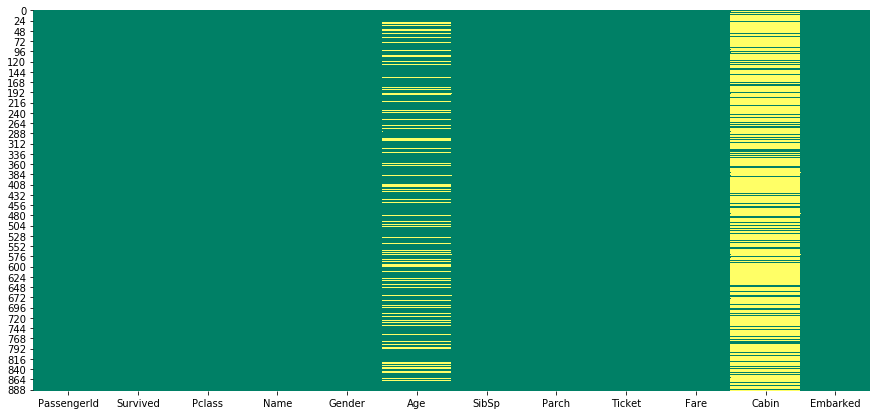

In [7]:
#visualization for the nan values using heatmap
plt.figure(figsize=(15,7))
sns.heatmap(train.isna(),cbar=False,cmap='summer')

In [8]:
#checking for the balancing of the data set
x=(train.Survived==0).value_counts()
x

True     549
False    342
Name: Survived, dtype: int64

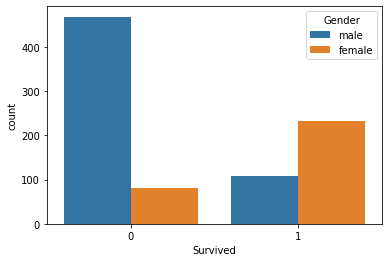

In [9]:
# visualization for the survided depending on the gender
sns.countplot(x='Survived',hue='Gender',data=train)

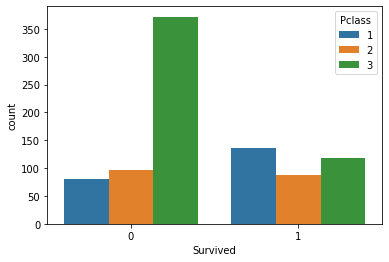

In [10]:
#visualization for the survived depending on the class of tickets
sns.countplot(x='Survived',hue='Pclass',data=train)

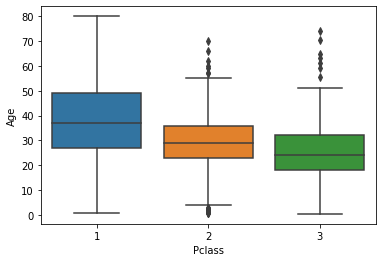

In [11]:
#visualization on the age on ticket class vise
sns.boxplot(y='Age',x='Pclass',data=train)

In [4]:
# droping the cabin coloumn in the data set
train=train.drop('Cabin',axis=1)

In [13]:
#cheking no of na values in age depending on the class
train[train.Pclass==1].Age.isna().sum()

30

In [14]:
train[train.Pclass==2].Age.isna().sum()

11

In [15]:
train[train.Pclass==3].Age.isna().sum()

136

In [16]:
train[train.Age.isna()]['Pclass'].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

In [17]:
#finding the mean of the age depending in the class of ticket
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [5]:
# replacing na values in age with mean of age depending on class
train.Age.fillna(train.groupby('Pclass')['Age'].transform('mean'),inplace=True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [6]:
# droping all rows with na values
train.dropna(inplace=True)

In [7]:
train.shape

(889, 11)

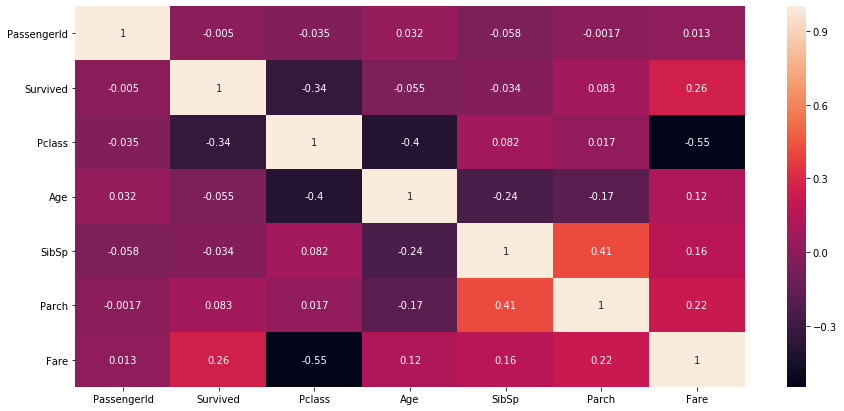

In [26]:
# ploting heatmap for corellation
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(),annot=True)

In [28]:
# creating dummy variables for the gender
pd.get_dummies(train['Gender'],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [31]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [8]:
#generating dummy variables for embark and the gender
embark=pd.get_dummies(train['Embarked'],prefix='Embarked',drop_first=True)
gender=pd.get_dummies(train['Gender'],prefix='Gender',drop_first=True)

In [24]:
# concatinating it to the data frame
te=pd.concat([tr,embark,gender],axis=1)

In [25]:
te

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Gender_male
0,0,3,22.00000,1,0,7.2500,0,1,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,1,0
3,1,1,35.00000,1,0,53.1000,0,1,0
4,0,3,35.00000,0,0,8.0500,0,1,1
5,0,3,25.14062,0,0,8.4583,1,0,1
6,0,1,54.00000,0,0,51.8625,0,1,1
7,0,3,2.00000,3,1,21.0750,0,1,1
8,1,3,27.00000,0,2,11.1333,0,1,0
9,1,2,14.00000,1,0,30.0708,0,0,0


In [26]:
# Loading the dependent and independent variables
feature_coloums=['Pclass','Age','SibSp','Parch','Embarked_Q','Embarked_S','Gender_male']
x=te[feature_coloums]# independent variables
y=te['Survived']#dependent variable

In [27]:
#spliting train data into train and split for the checking model acurracy
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(te.drop('Survived',axis=1),te['Survived'],test_size=0.30,random_state=101)

In [28]:
# importing model from sklearn package
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()#loading model
logmodel.fit(x_train,y_train)# fitting model with the train data set

#predicting the modelon both the train and test for checking ofowerfitting of model
pred_train=logmodel.predict(x_train)
pred_test=logmodel.predict(x_test)

In [31]:
# importing required metics for the model
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score

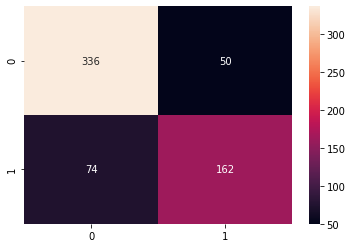

In [33]:
# printing confusion matrix using heatmap
cn_matrix=confusion_matrix(y_true=y_train,y_pred=pred_train)
cm=pd.DataFrame(cn_matrix)
sns.heatmap(cm,annot=True,fmt='g')

In [34]:
#for true and false positve rate 
fpr, tpr,_=roc_curve(y_train,pred_train)
fpr1,tpr1,_1=roc_curve(y_test,pred_test)

In [35]:
#cal ac
roc_curve=auc(fpr,tpr)
print('ROC AUC:%0.3f' % roc_curve)
roc_curve1=auc(fpr1,tpr1)
print('ROC AUC:%0.3f' % roc_curve1)

ROC AUC:0.778
ROC AUC:0.781


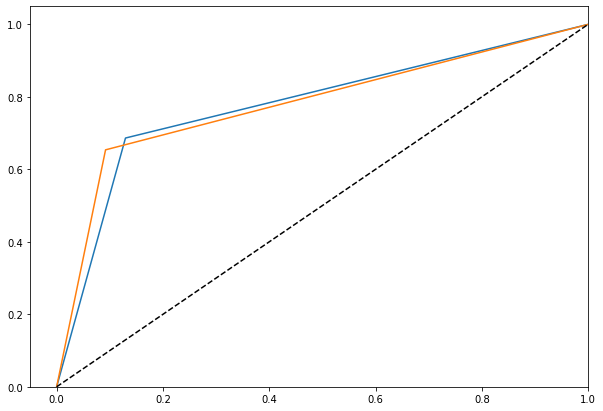

In [40]:
#printing roc curve
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label='ROC ACC:%0.3f' % roc_curve)
plt.plot(fpr1,tpr1,label='ROC AUC:%0.3f' % roc_curve1)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.show()